In [1]:
import pandas as pd
import numpy as np
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('houses_train.csv')
data

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,5546,130000.0,newly repaired,Center,4,Sayat Nova Ave,3,Yerevan,96.0,http://www.myrealty.am/en/item/28244/3-senyaka...,1,stone,3,3.2
1,2979,65000.0,good,Arabkir,5,Hr.Kochar St,3,Yerevan,78.0,http://www.myrealty.am/en/item/18029/3-senyaka...,1,stone,2,2.8
2,2698,129000.0,good,Center,10,M.Khorenatsi St,3,Yerevan,90.0,http://www.myrealty.am/en/item/37797/3-senyaka...,1,panel,3,2.8
3,4548,52000.0,newly repaired,Center,14,Argishti St,2,Yerevan,53.0,http://www.myrealty.am/en/item/36153/2-senyaka...,1,monolit,5,3.0
4,2982,65000.0,newly repaired,Center,12,Mashtots Ave,2,Yerevan,47.0,http://www.myrealty.am/en/item/17566/2-senyaka...,1,panel,3,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2417,56000.0,good,Davtashen,16,Davtashen 3 district,3,Yerevan,100.0,http://www.myrealty.am/en/item/30305/3-senyaka...,1,panel,8,2.8
4996,1307,115000.0,good,Arabkir,6,Adonts St,3,Yerevan,135.0,http://www.myrealty.am/en/item/4118/3-senyakan...,1,stone,5,2.8
4997,2863,127000.0,newly repaired,Center,9,Yekmalyan St,3,Yerevan,73.0,http://www.myrealty.am/en/item/32305/3-senyaka...,2,monolit,3,3.0
4998,1470,41800.0,good,Center,5,D. Demirchyan St,1,Yerevan,48.0,http://www.myrealty.am/en/item/34952/1-senyaka...,1,stone,1,2.8


In [3]:
y=data['price']
data= pd.get_dummies(data[['condition','district', 'max_floor', 'num_rooms', 'area', 'num_bathrooms', 'building_type', 'floor', 'ceiling_height']])
data


,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,condition_good,condition_newly repaired,condition_zero condition,district_Achapnyak,...,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district,building_type_monolit,building_type_other,building_type_panel,building_type_stone
0,4,3,96.0,1,3,3.2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,3,78.0,1,2,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10,3,90.0,1,3,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14,2,53.0,1,5,3.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12,2,47.0,1,3,2.8,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16,3,100.0,1,8,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4996,6,3,135.0,1,5,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4997,9,3,73.0,2,3,3.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4998,5,1,48.0,1,1,2.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

In [5]:
lm=linear_model.LinearRegression()
regr=lm.fit(X_train, y_train)
predict =lm.predict(X_test)
predict_train =lm.predict(X_train)

In [8]:
print('Root mean squared error Test: %.2f'
      % np.sqrt(mean_squared_error(y_test, predict)))
print('R-squared: %.2f'
      % r2_score(y_test, predict))

Root mean squared error Test: 28664.31
R-squared: 0.70


In [9]:
print('Root mean squared error Train: %.2f'
      % np.sqrt(mean_squared_error(y_train, predict_train)))
print('R-squared: %.2f'
      % r2_score(y_train, predict_train))

Root mean squared error Train: 29336.96
R-squared: 0.67


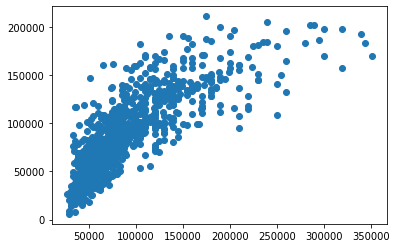

In [8]:
plt.scatter(y_test, predict)

In [12]:
from sklearn.linear_model import Ridge

In [60]:
rr = Ridge(alpha=10)
rr.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [61]:
predict =rr.predict(X_test)
predict_train = rr.predict(X_train)

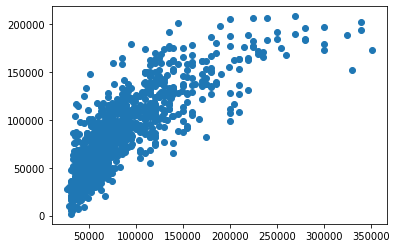

In [62]:
plt.scatter(y_test, predict)

In [63]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, predict)))

print('R-squared: %.2f'
      % r2_score(y_test, predict))

Root mean squared error: 29837.64
R-squared: 0.65


In [19]:
from sklearn.model_selection import KFold

In [20]:
kf=KFold(n_splits=5)
test_rmse = []
train_rmse = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data.loc[train_index], data.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    predictions_train = lm.predict(X_train)
    
    test_rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, predictions_train)))

In [21]:
np.mean(train_rmse)

29174.417324968574

In [22]:
np.mean(test_rmse)

29325.21319817643